# DESAFIO DATA SCIENCE - SEMANTIX

### Candidato: Rodrigo Antonio de Freitas Vieira


In [1]:
# IMPORTS

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# Função auxiliar para plotar diferentes gráficos de barra na mesma figura
def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)

In [3]:
# CARREGANDO DADOS

data = pd.read_csv('../../bank-full.csv', delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
display(data.describe(include=(np.number)))
data.describe(include=(object))

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


no     39922
yes     5289
Name: y, dtype: int64

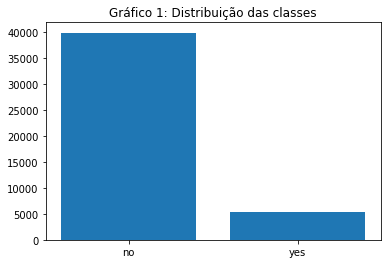

In [6]:
class_distribution = data['y'].value_counts()
display(class_distribution)
plt.title('Gráfico 1: Distribuição das classes')
_ = plt.bar(class_distribution.index, class_distribution)

***
# PERGUNTAS & RESPOSTAS

### **1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?**

#### Nessa base de dados há dois tipos de empréstimos, os pessoais ('loan') e o imobiliário ('housing'). Selecionando as entradas com ao menos um empréstimo observa-se que a profissão intitulada 'blue-collar' é a que mais aparece em frequência absoluta com 7599 entradas. Pode-se conferir isso na primeira coluna da tabela abaixo, bem como no Gráfico 2. Contudo, a distribuição de profissões nessa base de dados não é balanceada, logo, para indicar a profissão com maior tendência a realizar um empréstimo é necessário observar a frequência relativa à quantidade de vezes que a profissão aparece na base. Ainda assim, 'blue-collar' tem uma maior frequência relativa onde 78,08% dos que tem essa profissão realizaram um empréstimo. Esses resultados podem ser vistos na segunda coluna da tabela abaixo e no Gráfico 3.

#### Dessa forma, podemos dizer que a profissão que tem a maior tendência a fazer um empréstimo é 'blue-collar'.

,Freq Abs,Freq Relat
blue-collar,7599,0.780826
management,5225,0.552442
technician,4608,0.606555
admin.,3569,0.690195
services,3063,0.737362
entrepreneur,1016,0.683255
self-employed,864,0.547182
retired,699,0.308746
unemployed,589,0.452034
housemaid,490,0.395161


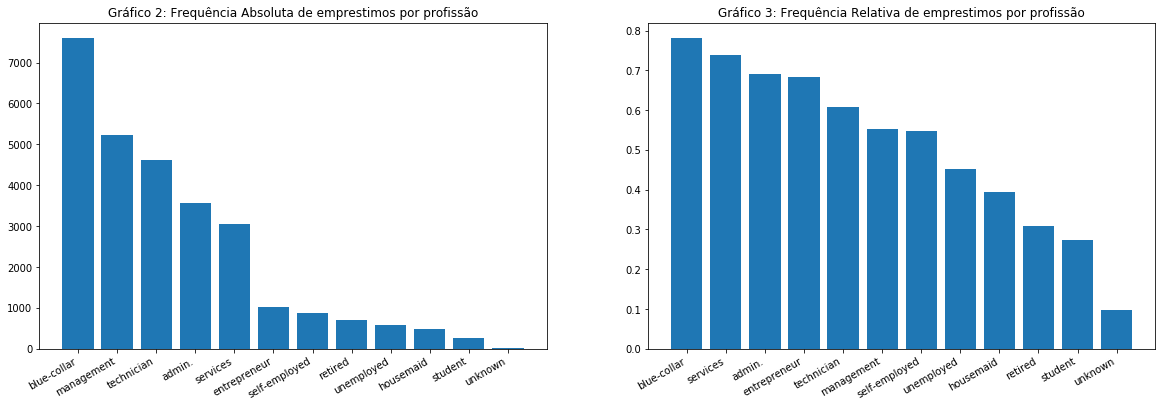

In [7]:
profissoes_emprestimo_abs = data['job'][(data.loan=='yes') | (data.housing=='yes')].value_counts()
profissoes_emprestimo_relativo = (profissoes_emprestimo_abs/data['job'].value_counts()).sort_values(ascending=False)

frequencias_job = pd.concat([profissoes_emprestimo_abs,profissoes_emprestimo_relativo], axis=1,sort=False, keys=['Freq Abs', 'Freq Relat'])
display(frequencias_job)

plt.figure(figsize=(20,6))
ax = plt.subplot(121)
plt.title('Gráfico 2: Frequência Absoluta de emprestimos por profissão')
plt.bar(profissoes_emprestimo_abs.index, profissoes_emprestimo_abs)
#ax = sns.barplot(x=profissoes_emprestimo_abs.index, y=profissoes_emprestimo_abs)
_ = plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

ax = plt.subplot(122)
plt.title('Gráfico 3: Frequência Relativa de emprestimos por profissão')
plt.bar(profissoes_emprestimo_relativo.index, profissoes_emprestimo_relativo)
_ = plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

#### Das entradas na base de dados em que um profissional 'blue-collar' realizou ao menos um empréstimo, em 93% das vezes foi realizado um empréstimo imobiliário (Gráfico 4).

#### (Obs.: As porcentagens não se somam porque estou levando em consideração os empréstimos de forma independente)

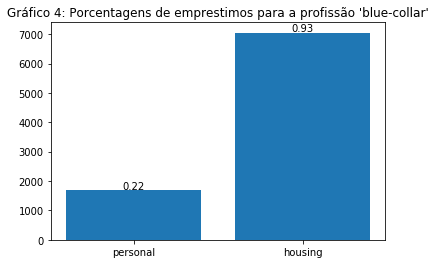

In [8]:
emprestimo_bluecollar = data[ ((data.loan=='yes') | (data.housing=='yes'))  &  (data.job=='blue-collar')]
bc_loan = emprestimo_bluecollar['loan'][emprestimo_bluecollar.loan=='yes'].count()
bc_housing = emprestimo_bluecollar['housing'][emprestimo_bluecollar.housing=='yes'].count()

plt.title('Gráfico 4: Porcentagens de emprestimos para a profissão \'blue-collar\'')
ax = plt.subplot(111)
ax.bar(['personal', 'housing'], [bc_loan,bc_housing])
total = float(len(emprestimo_bluecollar))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 40, '{:1.2f}'.format(height/total), ha="center")

### **2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?**

#### A partir da tabela abaixo podemos observar que a frequência absoluta dos clientes que aderiram a campanha com apenas um contato foi de 2561, o que equivale à 48,42%. Enquanto que 1401, ou seja, 26,49% dos clientes que aderiram o fizeram após duas ligações. 

#### Se formos observar a proporção entre clientes que aderiram a campanha e o total de clientes em relação à quantidade de contatos, temos que 14,60% dos clientes que receberam um contato aderiram. Ainda podemos constatar que com o aumento no número de ligações a proporção tende a cair, entre clientes que receberam 2 contatos 11,20% aderiram a campanha, e com 3 e 4 contatos, 11,19% e 9% aderiram respectivamente.

,Freq Abs,Freq Relat,Proporção
1,2561,0.484213,0.145976
2,1401,0.264889,0.112035
3,618,0.116846,0.111936
4,317,0.059936,0.090006
5,139,0.026281,0.078798
6,92,0.017395,0.071263
7,47,0.008886,0.063946
8,32,0.006050,0.059259
9,21,0.003971,0.064220
10,14,0.002647,0.052632


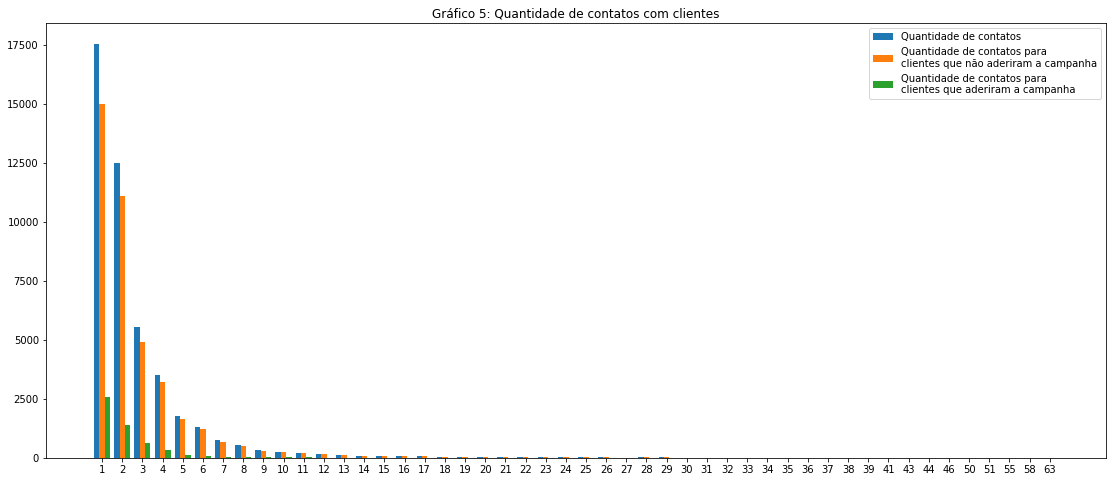

In [9]:
contacts = data['campaign'].value_counts().sort_index()
contacts_no = data['campaign'][data.y=='no'].value_counts().sort_index()
contacts_yes = data['campaign'][data.y=='yes'].value_counts().sort_index()

contacts_no_full, contacts_yes_full = pd.Series.align(contacts_no,contacts_yes, join='outer', axis=0, fill_value=0)

plt.figure(figsize=(19,8))
subcategorybar(contacts.index, [contacts,contacts_no_full,contacts_yes_full])
plt.title('Gráfico 5: Quantidade de contatos com clientes')
_ = plt.legend(['Quantidade de contatos','Quantidade de contatos para \nclientes que não aderiram a campanha',
                'Quantidade de contatos para \nclientes que aderiram a campanha'])


contacts_yes_relativo = (contacts_yes/len(data[data.y=='yes']))
contacts_yes_proportion = contacts_yes/contacts.loc[contacts_yes.index]

frequencias_contacts = pd.concat([contacts_yes,contacts_yes_relativo,contacts_yes_proportion], axis=1,sort=False, keys=['Freq Abs', 'Freq Relat', 'Proporção'])
display(frequencias_contacts)

### **3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?**

#### Levando em consideração a frequência relativa que apresentei na questão anterior, eu pude calcular uma média ponderada obtendo uma média de 2 ligações. Essa quantidade de contatos faz sentido visto que quase 75% dos clientes que aderiram a campanha o fizeram após apena duas ligações. Ademais, se levarmos em consideração que mais de 95% dos clientes que aderiram a campanha o fizeram com 5 ligações, eu indicaria esse valor como máximo. Dessa forma, seria possível economizar na quantidade de ligações adicionais que trariam baixo retorno.

In [10]:
print('Valor Médio: ', np.average(contacts_yes.index, weights=contacts_yes_relativo))

print('\nAcumulado:\n',np.cumsum(contacts_yes_relativo))

Valor Médio:  2.141047456986199

Acumulado:
 1     0.484213
2     0.749102
3     0.865948
4     0.925884
5     0.952165
6     0.969559
7     0.978446
8     0.984496
9     0.988467
10    0.991114
11    0.994139
12    0.994895
13    0.996029
14    0.996786
15    0.997542
16    0.997920
17    0.999055
20    0.999244
21    0.999433
24    0.999622
29    0.999811
32    1.000000
Name: campaign, dtype: float64


### **4. O resultado da campanha anterior tem relevância na campanha atual?**

#### Sim, como podemos ver o pelo gráfico e pela tabela abaixo, indivíduos que aderiram a campanhas anterior também aderiram a atual com uma taxa de 64,72%.

failure    0.126097
other      0.166848
success    0.647253
unknown    0.091615
Name: poutcome, dtype: float64

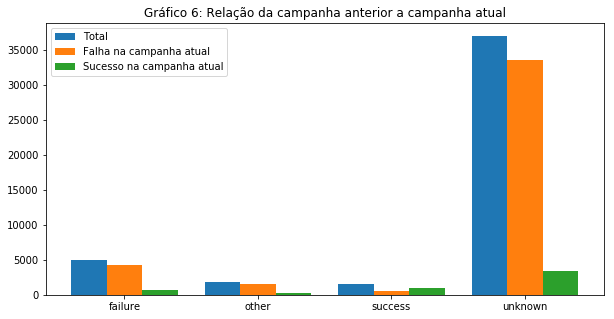

In [11]:
poutcome = data.poutcome.value_counts().sort_index()
poutcome_y = data.poutcome[data.y=='yes'].value_counts().sort_index()
poutcome_n = data.poutcome[data.y=='no'].value_counts().sort_index()

aux = pd.concat([poutcome,poutcome_n,poutcome_y], axis=1,sort=False, keys=['Total', 'Não', 'Sim'])
display(poutcome_y/poutcome)

plt.figure(figsize=(10,5))
subcategorybar(poutcome.index, [poutcome,poutcome_n,poutcome_y])
plt.title('Gráfico 6: Relação da campanha anterior a campanha atual')
_ = plt.legend(['Total','Falha na campanha atual', 'Sucesso na campanha atual'])

### **5. Qual o fator determinante para que o banco exija um seguro de crédito?**

Ao compararmos clientes com empréstimos e sem empréstimos a maior diferença é a idade mínima, clientes com empréstimos têm ao menos 20 anos.

In [12]:
sem_emprestimo = data[(data.loan=='no') | (data.housing=='no')]
com_emprestimo = data[(data.loan=='yes') | (data.housing=='yes')]

print('Clientes sem empréstimos')
display(sem_emprestimo.describe(include=(np.number)))
display(sem_emprestimo.describe(include=(object)))

print('\n\nClientes com empréstimos')
display(com_emprestimo.describe(include=(np.number)))
display(com_emprestimo.describe(include=(object)))

Clientes sem empréstimos


,age,balance,day,duration,campaign,pdays,previous
count,40844.000000,40844.000000,40844.000000,40844.000000,40844.000000,40844.000000,40844.000000
mean,41.108045,1423.615145,15.788243,258.842768,2.766526,39.476814,0.572887
std,10.770062,3138.995086,8.328546,257.992179,3.075484,99.421163,2.297489
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,83.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,474.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,49.000000,1501.000000,21.000000,321.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,40844,40844,40844,40844,40844,40844,40844,40844,40844,40844
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,8752,24243,20547,40162,20763,37967,26623,11914,33440,35820




Clientes com empréstimos


,age,balance,day,duration,campaign,pdays,previous
count,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000,28007.000000
mean,39.508337,1131.713357,15.649159,258.309958,2.727425,47.770200,0.622916
std,9.148473,2439.751755,8.090669,257.904400,3.167384,110.445528,2.608392
min,20.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,53.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,38.000000,391.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,46.000000,1202.000000,21.000000,317.000000,3.000000,-1.000000,0.000000
max,78.000000,58544.000000,31.000000,4918.000000,63.000000,854.000000,275.000000


,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,28007,28007,28007,28007,28007,28007,28007,28007,28007,28007
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,7599,17010,15686,27404,25130,20763,16741,12217,22594,25853


### **6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?**

#### A partir das tabelas e gráficos abaixo, podemos dizer que clientes que possuem empréstimo imobiliário são em sua maioria casados, com profissão 'blue-collar', com formação secundária, não possuem inadimplência de crédito, não possuem empréstimos pessoais, tenderam à não adesão da campanha, possuem uma idade média de 39 anos e um balanço patrimonial médio de R$1175,10.

#### Se compararmos características de clientes que possuem empréstimo imobiliário com aqueles não possuem, podemos dizer que aqueles tendem a aderir menos às campanhas do que estes. Também podemos apontar que a idade média de clientes com empréstimo imobiliário é 4 anos menor do que clientes sem empréstimo.

In [14]:
data_housing_yes = data[data.housing=='yes']
data_housing_no = data[data.housing=='no']


print('Clientes com empréstimo imobiliário')
display(data_housing_yes.describe(include=(np.number)))
display(data_housing_yes.describe(include=(object)))

print('\n\nClientes sem empréstimo imobiliário')
display(data_housing_no.describe(include=(np.number)))
display(data_housing_no.describe(include=(object)))

Clientes com empréstimo imobiliário


,age,balance,day,duration,campaign,pdays,previous
count,25130.000000,25130.000000,25130.000000,25130.000000,25130.000000,25130.000000,25130.000000
mean,39.175288,1175.103064,15.598249,259.331476,2.698488,51.312495,0.656665
std,8.926807,2483.285761,8.026836,258.321907,3.140979,113.862848,2.707428
min,20.000000,-4057.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,62.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,38.000000,412.000000,15.000000,182.000000,2.000000,-1.000000,0.000000
75%,45.000000,1257.750000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,78.000000,58544.000000,31.000000,4918.000000,63.000000,854.000000,275.000000


,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130
unique,12,3,4,2,1,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,7048,15321,14038,24695,25130,20763,14603,12076,19990,23195




Clientes sem empréstimo imobiliário


,age,balance,day,duration,campaign,pdays,previous
count,20081.000000,20081.000000,20081.000000,20081.000000,20081.000000,20081.000000,20081.000000
mean,43.139883,1596.501270,16.066929,256.700911,2.845625,26.288581,0.484787
std,12.058696,3613.405339,8.671437,256.529524,3.041508,77.461032,1.660227
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,85.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,42.000000,507.000000,17.000000,178.000000,2.000000,-1.000000,0.000000
75%,52.000000,1708.000000,23.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,3881.000000,41.000000,871.000000,37.000000


,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081
unique,12,3,4,2,1,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,aug,unknown,no
freq,4780,11893,9164,19701,20081,17204,14682,5144,16969,16727


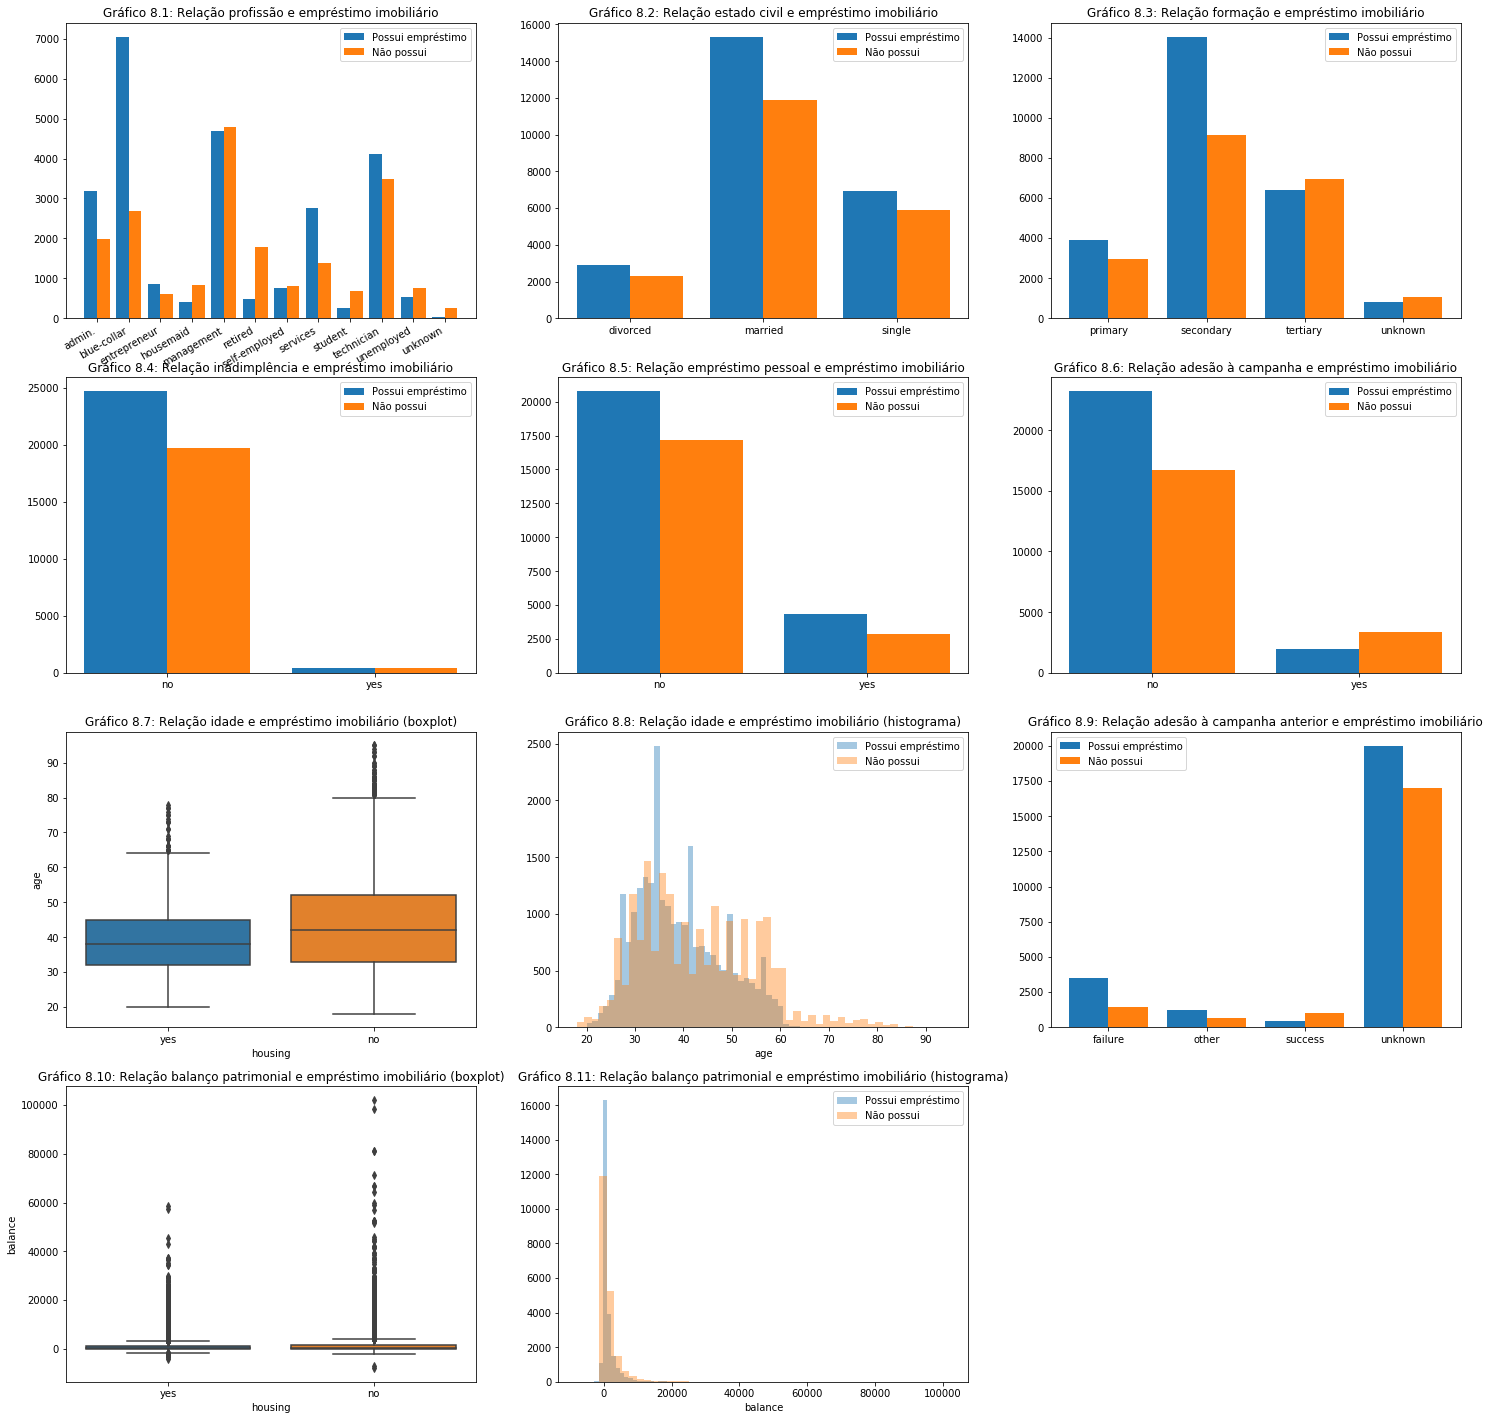

In [15]:

plt.figure(figsize=(25,25))
#job
ax = plt.subplot(431)
dt_job = data['job'].value_counts().sort_index()
dthy_job = data_housing_yes['job'].value_counts().sort_index()
dthn_job = data_housing_no['job'].value_counts().sort_index()
subcategorybar(dt_job.index, [ dthy_job, dthn_job])
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.title('Gráfico 8.1: Relação profissão e empréstimo imobiliário')
_ = plt.legend(['Possui empréstimo','Não possui'])

#marital
plt.subplot(432)
dt_marital = data['marital'].value_counts().sort_index()
dthy_marital = data_housing_yes['marital'].value_counts().sort_index()
dthn_marital = data_housing_no['marital'].value_counts().sort_index()
subcategorybar(dt_marital.index, [dthy_marital, dthn_marital])
plt.title('Gráfico 8.2: Relação estado civil e empréstimo imobiliário')
_ = plt.legend(['Possui empréstimo','Não possui'])

#education
plt.subplot(433)
dt_education = data['education'].value_counts().sort_index()
dthy_education = data_housing_yes['education'].value_counts().sort_index()
dthn_education = data_housing_no['education'].value_counts().sort_index()
subcategorybar(dt_education.index, [dthy_education,dthn_education])
plt.title('Gráfico 8.3: Relação formação e empréstimo imobiliário')
_ = plt.legend(['Possui empréstimo','Não possui'])

#default
dt_default = data['default'].value_counts().sort_index()
dthy_default = data_housing_yes['default'].value_counts().sort_index()
dthn_default = data_housing_no['default'].value_counts().sort_index()
plt.subplot(434)
subcategorybar(dt_default.index, [dthy_default,dthn_default])
plt.title('Gráfico 8.4: Relação inadimplência e empréstimo imobiliário')
_ = plt.legend(['Possui empréstimo','Não possui'])

#loan
dt_loan = data['loan'].value_counts().sort_index()
dthy_loan = data_housing_yes['loan'].value_counts().sort_index()
dthn_loan = data_housing_no['loan'].value_counts().sort_index()
plt.subplot(435)
subcategorybar(dt_loan.index, [dthy_loan,dthn_loan])
plt.title('Gráfico 8.5: Relação empréstimo pessoal e empréstimo imobiliário')
_ = plt.legend(['Possui empréstimo','Não possui'])


#y
dt_y = data['y'].value_counts().sort_index()
dthy_y = data_housing_yes['y'].value_counts().sort_index()
dthn_y = data_housing_no['y'].value_counts().sort_index()
plt.subplot(436)
subcategorybar(dt_y.index, [dthy_y,dthn_y])
plt.title('Gráfico 8.6: Relação adesão à campanha e empréstimo imobiliário')
_ = plt.legend(['Possui empréstimo','Não possui'])


#age
plt.subplot(437)
g = sns.boxplot(x="housing", y="age", data=data)
plt.title('Gráfico 8.7: Relação idade e empréstimo imobiliário (boxplot)')

plt.subplot(438)
sns.distplot(a=data_housing_yes['age'], kde=False)
sns.distplot(a=data_housing_no['age'], kde=False)
plt.title('Gráfico 8.8: Relação idade e empréstimo imobiliário (histograma)')
_ = plt.legend(['Possui empréstimo','Não possui'])


#poutcome
dt_poutcome = data['poutcome'].value_counts().sort_index()
dthy_poutcome = data_housing_yes['poutcome'].value_counts().sort_index()
dthn_poutcome = data_housing_no['poutcome'].value_counts().sort_index()
plt.subplot(439)
subcategorybar(dt_poutcome.index, [dthy_poutcome,dthn_poutcome])
plt.title('Gráfico 8.9: Relação adesão à campanha anterior e empréstimo imobiliário')
_ = plt.legend(['Possui empréstimo','Não possui'])



plt.subplot(4,3,10)
g = sns.boxplot(x="housing", y="balance", data=data)
plt.title('Gráfico 8.10: Relação balanço patrimonial e empréstimo imobiliário (boxplot)')

plt.subplot(4,3,11)
sns.distplot(a=data_housing_yes['balance'], kde=False)
sns.distplot(a=data_housing_no['balance'], kde=False)
plt.title('Gráfico 8.11: Relação balanço patrimonial e empréstimo imobiliário (histograma)')
_ = plt.legend(['Possui empréstimo','Não possui'])


plt.show()